# Directors
Descriptives of the different directors

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
# load data
sns.set_style('whitegrid')

df = pd.read_csv('./episode_info_merged.csv', index_col = 0) # path will need updating to new repo path

In [4]:
# Print names for all directors
df.director.unique()

array(['James Burrows ', 'Pamela Fryman ', 'Arlene Sanford ',
       'Peter Bonerz ', 'Paul Lazarus ', 'Alan Myerson ',
       'Michael Lembeck ', 'Gail Mancuso ', 'Robby Benson ',
       'Kevin Bright (as Kevin S. Bright)    ', 'Ellen Gittelsohn ',
       'Mary Kay Place ', 'Thomas Schlamme ', 'Kevin Bright ',
       'Steve Zuckerman ', 'Terry Hughes ', 'Sam Simon ',
       'Shelley Jensen ', 'Gary Halvorson ', 'David Steinberg ',
       'Dana De Vally Piazza (as Dana J. deVally)    ',
       'Dana De Vally Piazza (as Dana deVally)    ',
       'Dana De Vally Piazza ', 'Joe Regalbuto ', 'Andrew Tsao ',
       'Todd Holland ', 'David Schwimmer ', 'Ben Weiss ',
       'Stephen Prime ',
       'Kevin Bright (as Kevin S. Bright), Gary Halvorson ',
       'Sheldon Epps ', 'Roger Christiansen '], dtype=object)

In [21]:
# Homogenize names
df['director'] = df['director'].astype(str).str.replace('\(as Kevin S. Bright\)','')
df['director'] = df['director'].astype(str).str.replace(' \(as Dana J. deVally\)   ','')
df['director'] = df['director'].astype(str).str.replace(' \(as Dana deVally\)','')
df['director'] = df.director.str.rstrip()

In [22]:
# Remove columns not needed
df = df.drop(columns = ['scene', 'location'])

In [23]:
# Create column with the overall episode number in the show
df["overall_ep"] = df["season"].astype(str) + df["episode"].astype(str)

In [24]:
# We only need one observation linking director with episode, so remove repetitions

df = df.drop_duplicates('overall_ep')


df.head()

,episode,writers,airdate,US viewers in Milln,season,month,title,director,Rating,number_of_reviews,overall_ep
0,1,David Crane & Marta Kauffman,1994-09-22,21.5,1,9,The One Where Monica Gets a Roommate,James Burrows,8.3,6579,11
15,2,David Crane & Marta Kauffman,1994-09-29,20.2,1,9,The One with the Sonogram at the End,James Burrows,8.1,4953,12
26,3,Jeffrey Astrof & Mike Sikowitz,1994-10-06,19.5,1,10,The One with the Thumb,James Burrows,8.2,4667,13
41,4,Alexa Junge,1994-10-13,19.7,1,10,The One with George Stephanopoulos,James Burrows,8.1,4524,14
57,5,Jeff Greenstein & Jeff Strauss,1994-10-20,18.6,1,10,The One with the East German Laundry Detergent,Pamela Fryman,8.5,4498,15


In [10]:
# Number of episodes each director has directed

print(df.director.value_counts())

Gary Halvorson                   54
Kevin Bright                     39
Michael Lembeck                  20
James Burrows                    15
Gail Mancuso                     14
Peter Bonerz                     12
Ben Weiss                        10
David Schwimmer                  10
Shelley Jensen                    6
Robby Benson                      6
Terry Hughes                      5
Dana De Vally Piazza              3
Sheldon Epps                      3
Pamela Fryman                     2
Thomas Schlamme                   2
Alan Myerson                      2
Steve Zuckerman                   2
Roger Christiansen                2
Todd Holland                      1
Joe Regalbuto                     1
Paul Lazarus                      1
Andrew Tsao                       1
Ellen Gittelsohn                  1
Sam Simon                         1
Mary Kay Place                    1
David Steinberg                   1
Arlene Sanford                    1
Stephen Prime               

In [25]:
# Replace directors with less than 10 episodes with 'other' to group them in a single category
df.loc[df['director'] == 'Gary Halvorson', 'dir'] = 'Gary Halvorson'
df.loc[df['director'] == 'Kevin Bright', 'dir'] = 'Kevin Bright'
df.loc[df['director'] == 'Michael Lembeck', 'dir'] = 'Michael Lembeck'
df.loc[df['director'] == 'James Burrows', 'dir'] = 'James Burrows'
df.loc[df['director'] == 'Gail Mancuso', 'dir'] = 'Gail Mancuso'
df.loc[df['director'] == 'Peter Bonerz', 'dir'] = 'Peter Bonerz'
df.loc[df['director'] == 'Ben Weiss', 'dir'] = 'Ben Weiss'
df.loc[df['director'] == 'David Schwimmer', 'dir'] = 'David Schwimmer'
df.loc[(df['director'] != 'Kevin Bright') & (df['director'] != 'Gary Halvorson') & (df['director'] != 'Michael Lembeck') &
       (df['director'] != 'James Burrows') & (df['director'] != 'Gail Mancuso') & (df['director'] != 'Peter Bonerz') &
       (df['director'] != 'Ben Weiss') & (df['director'] != 'David Schwimmer'),'dir'] = "Other"
    
    
df.head()

,episode,writers,airdate,US viewers in Milln,season,month,title,director,Rating,number_of_reviews,overall_ep,dir
0,1,David Crane & Marta Kauffman,1994-09-22,21.5,1,9,The One Where Monica Gets a Roommate,James Burrows,8.3,6579,11,James Burrows
15,2,David Crane & Marta Kauffman,1994-09-29,20.2,1,9,The One with the Sonogram at the End,James Burrows,8.1,4953,12,James Burrows
26,3,Jeffrey Astrof & Mike Sikowitz,1994-10-06,19.5,1,10,The One with the Thumb,James Burrows,8.2,4667,13,James Burrows
41,4,Alexa Junge,1994-10-13,19.7,1,10,The One with George Stephanopoulos,James Burrows,8.1,4524,14,James Burrows
57,5,Jeff Greenstein & Jeff Strauss,1994-10-20,18.6,1,10,The One with the East German Laundry Detergent,Pamela Fryman,8.5,4498,15,Other


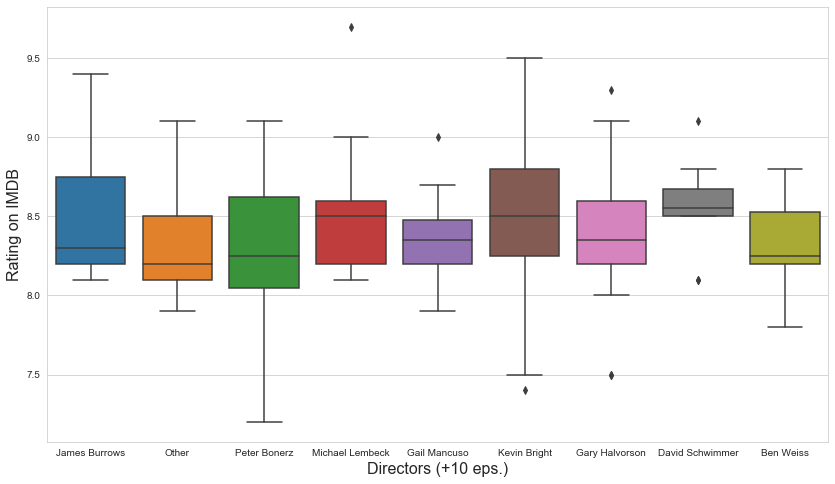

In [26]:
# Plot relationship between directors and the rating for their episodes
plt.figure(figsize = (14,8))

sns.boxplot(df['dir'], df.Rating)

plt.xlabel('Directors (+10 eps.)', fontsize = 16)
plt.ylabel('Rating on IMDB', fontsize = 16)

plt.show()


In [ ]:
# Fit a model to see if there are differences
df_copy = df.copy()

# Create dummies for each category under directors
dummies = pd.get_dummies(df_copy.dir)

dir_dummies = df_copy.join(dummies)

dir_dummies = dir_dummies.rename(columns={"Ben Weiss": "BenWeiss", "David Schwimmer": "DavidSchwimmer",
                                         "Gail Mancuso": 'GailMancuso', 'Gary Halvorson': 'GaryHalvorson',
                                         'James Burrows': 'JamesBurrows', 'Kevin Bright': 'KevinBright',
                                         'Michael Lembeck': 'MichaelLembeck', 'Peter Bonerz': 'PeterBonerz'})

# Split data
dir_dum_train = dir_dummies.sample(frac = .75, random_state = 732)

dir_dum_test = dir_dummies.drop(dir_dum_train.index)

dir_dum_train.head()


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
X = dir_dum_train[['Ben Weiss', 'David Schwimmer', 'Gail Mancuso', 'Gary Halvorson', 'James Burrows',
                  'Kevin Bright', 'Michael Lembeck', 'Peter Bonerz', 'Other']]

Y = dir_dum_train['Rating']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .25, random_state = 28)

regr = linear_model.LinearRegression()

regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)


In [ ]:
from statsmodels.formula.api import ols

In [ ]:
modBW = ols('Rating ~ BenWeiss', data = dir_dum_train)
fit_modBW = mod.fit()
fit_modBW.summary()

In [ ]:
modDS = ols('Rating ~ DavidSchwimmer', data = dir_dum_train)
fit_modDS = mod.fit()
fit_modDS.summary()

In [ ]:
modGM = ols('Rating ~ GailMancuso', data = dir_dum_train)
fit_modGM = mod.fit()
fit_modGM.summary()

In [ ]:
modML = ols('Rating ~ MichaelLembeck', data = dir_dum_train)
fit_modML = mod.fit()
fit_modML.summary()

### Play with writers column

In [222]:
print(df.writers.value_counts())

Andrew Reich & Ted Cohen                                                  11
Alexa Junge                                                               11
David Crane & Marta Kauffman                                               9
Doty Abrams                                                                9
Shana Goldberg-Meehan                                                      8
                                                                          ..
Ellen Plummer & Sherry Bilsing & Brian Buckner & Sebastian Jones           1
Shana Goldberg-Meehan & Seth Kurland                                       1
Perry Rein & Gigi McCreery                                                 1
Pang-Ni Landrum & Mark Kunerth & Shana Goldberg-Meehan & Scott Silveri     1
Michael Curtis & Seth Kurland                                              1
Name: writers, Length: 93, dtype: int64


In [ ]:
df.writers.unique()